In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import os
from prophet import Prophet
import pandas as pd

In [2]:
df = pd.read_csv("Combined_AP.csv")

In [3]:
test = pd.read_csv("2023-09 HC(ap).csv")

In [4]:
real = pd.read_csv("2023-10 HC(ap).csv")

In [5]:
df

,압구정역,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Date,Count,Sum,Expect_Sales,Percent_Error
1,2023-01-01,-,-,NaN,NaN
2,2023-01-02,-,-,NaN,NaN
3,2023-01-03,-,-,NaN,NaN
4,2023-01-04,-,-,NaN,NaN
...,...,...,...,...,...
271,2023-09-28,85,"486,000",NaN,NaN
272,2023-09-29,0,0,NaN,NaN
273,2023-09-30,41,"293,400",NaN,NaN
274,average,127,"₩761,810",NaN,NaN


In [6]:
test.head()

,2023-09 매출 (키오스크),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Date,Count,Sum,0.0,1,2,3,4.0,5.0,6.0,...,14,15,16,17,18,19,20,21,22.0,23.0
1,2023-09-01,156,"935,167",0.0,0,0,0,0.0,0.0,0.0,...,"83,400","76,700","77,000","31,900","43,200","26,300","34,600","10,000",0.0,0.0
2,2023-09-02,137,"781,900",0.0,0,0,0,0.0,0.0,0.0,...,"118,400","67,000","55,600","38,900","24,600","27,100","52,400","2,500",0.0,0.0
3,2023-09-03,90,"599,600",0.0,0,0,0,0.0,0.0,0.0,...,"50,800","83,800","36,200","25,600",0,0,0,0,0.0,0.0
4,2023-09-04,144,"731,100",0.0,0,0,0,0.0,0.0,0.0,...,"83,800","72,200","25,100","16,300","51,500","13,000","11,600","16,900",0.0,0.0


In [7]:
df = df.drop([df.columns[1],df.columns[3],df.columns[4]],axis = 1)

In [8]:
df

,압구정역,Unnamed: 2
0,Date,Sum
1,2023-01-01,-
2,2023-01-02,-
3,2023-01-03,-
4,2023-01-04,-
...,...,...
271,2023-09-28,"486,000"
272,2023-09-29,0
273,2023-09-30,"293,400"
274,average,"₩761,810"


In [9]:
test

,2023-09 매출 (키오스크),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Date,Count,Sum,0.0,1,2,3,4.0,5.0,6.0,...,14,15,16,17,18,19,20,21,22.0,23.0
1,2023-09-01,156,"935,167",0.0,0,0,0,0.0,0.0,0.0,...,"83,400","76,700","77,000","31,900","43,200","26,300","34,600","10,000",0.0,0.0
2,2023-09-02,137,"781,900",0.0,0,0,0,0.0,0.0,0.0,...,"118,400","67,000","55,600","38,900","24,600","27,100","52,400","2,500",0.0,0.0
3,2023-09-03,90,"599,600",0.0,0,0,0,0.0,0.0,0.0,...,"50,800","83,800","36,200","25,600",0,0,0,0,0.0,0.0
4,2023-09-04,144,"731,100",0.0,0,0,0,0.0,0.0,0.0,...,"83,800","72,200","25,100","16,300","51,500","13,000","11,600","16,900",0.0,0.0
5,2023-09-05,145,"770,600",0.0,0,0,0,0.0,0.0,0.0,...,"58,700","43,500","24,700","62,500","22,300","63,400","36,900","2,500",0.0,0.0
6,2023-09-06,139,"843,300",0.0,0,0,0,0.0,0.0,0.0,...,"105,900","66,100","75,000","10,800","35,200","43,300","22,200",0,0.0,0.0
7,2023-09-07,165,"934,100",0.0,0,0,0,0.0,0.0,0.0,...,"203,500","40,900","31,800","15,300","20,300","28,800","24,900","48,000",0.0,0.0
8,2023-09-08,170,"979,800",0.0,0,0,0,0.0,0.0,0.0,...,"94,400","74,600","77,700","40,300","21,700","65,400","22,500","28,600",0.0,0.0
9,2023-09-09,184,"1,133,900",0.0,0,0,0,0.0,0.0,0.0,...,"75,700","97,600","69,900","39,400","81,800","50,300","127,100","5,000",0.0,0.0


In [10]:
test = test.iloc[1:31,:3]
test = test.drop(columns = 'Unnamed: 1')
test

,2023-09 매출 (키오스크),Unnamed: 2
1,2023-09-01,"935,167"
2,2023-09-02,"781,900"
3,2023-09-03,"599,600"
4,2023-09-04,"731,100"
5,2023-09-05,"770,600"
6,2023-09-06,"843,300"
7,2023-09-07,"934,100"
8,2023-09-08,"979,800"
9,2023-09-09,"1,133,900"
10,2023-09-10,"437,296"


In [11]:
real = real.iloc[1:32,:3]
real = real.drop(columns = 'Unnamed: 1')
real

,2023-10 매출 (키오스크),Unnamed: 2
1,2023-10-01,0
2,2023-10-02,"581,400"
3,2023-10-03,"473,900"
4,2023-10-04,"600,600"
5,2023-10-05,"995,600"
6,2023-10-06,"1,148,900"
7,2023-10-07,"939,700"
8,2023-10-08,"457,200"
9,2023-10-09,"566,200"
10,2023-10-10,"1,018,300"


In [12]:
test.reset_index()

,index,2023-09 매출 (키오스크),Unnamed: 2
0,1,2023-09-01,"935,167"
1,2,2023-09-02,"781,900"
2,3,2023-09-03,"599,600"
3,4,2023-09-04,"731,100"
4,5,2023-09-05,"770,600"
5,6,2023-09-06,"843,300"
6,7,2023-09-07,"934,100"
7,8,2023-09-08,"979,800"
8,9,2023-09-09,"1,133,900"
9,10,2023-09-10,"437,296"


In [13]:
real.reset_index()

,index,2023-10 매출 (키오스크),Unnamed: 2
0,1,2023-10-01,0
1,2,2023-10-02,"581,400"
2,3,2023-10-03,"473,900"
3,4,2023-10-04,"600,600"
4,5,2023-10-05,"995,600"
5,6,2023-10-06,"1,148,900"
6,7,2023-10-07,"939,700"
7,8,2023-10-08,"457,200"
8,9,2023-10-09,"566,200"
9,10,2023-10-10,"1,018,300"


In [14]:
real = real.reset_index(drop = True)
real

,2023-10 매출 (키오스크),Unnamed: 2
0,2023-10-01,0
1,2023-10-02,"581,400"
2,2023-10-03,"473,900"
3,2023-10-04,"600,600"
4,2023-10-05,"995,600"
5,2023-10-06,"1,148,900"
6,2023-10-07,"939,700"
7,2023-10-08,"457,200"
8,2023-10-09,"566,200"
9,2023-10-10,"1,018,300"


In [15]:
test = test.reset_index(drop = True)
test

,2023-09 매출 (키오스크),Unnamed: 2
0,2023-09-01,"935,167"
1,2023-09-02,"781,900"
2,2023-09-03,"599,600"
3,2023-09-04,"731,100"
4,2023-09-05,"770,600"
5,2023-09-06,"843,300"
6,2023-09-07,"934,100"
7,2023-09-08,"979,800"
8,2023-09-09,"1,133,900"
9,2023-09-10,"437,296"


In [16]:
test.columns

Index(['2023-09 매출 (키오스크)', 'Unnamed: 2'], dtype='object')

In [17]:
real.rename(columns = {"2023-10 매출 (키오스크)" : "ds","Unnamed: 2" : "y"}, inplace = True)
real

,ds,y
0,2023-10-01,0
1,2023-10-02,"581,400"
2,2023-10-03,"473,900"
3,2023-10-04,"600,600"
4,2023-10-05,"995,600"
5,2023-10-06,"1,148,900"
6,2023-10-07,"939,700"
7,2023-10-08,"457,200"
8,2023-10-09,"566,200"
9,2023-10-10,"1,018,300"


In [18]:
test.rename(columns = {"2023-09 매출 (키오스크)" : "ds","Unnamed: 2" : "y"}, inplace = True)
test

,ds,y
0,2023-09-01,"935,167"
1,2023-09-02,"781,900"
2,2023-09-03,"599,600"
3,2023-09-04,"731,100"
4,2023-09-05,"770,600"
5,2023-09-06,"843,300"
6,2023-09-07,"934,100"
7,2023-09-08,"979,800"
8,2023-09-09,"1,133,900"
9,2023-09-10,"437,296"


In [19]:
test['ds'] = pd.to_datetime(test['ds'], errors = 'coerce')

In [20]:
real['ds'] = pd.to_datetime(real['ds'], errors = 'coerce') 

In [21]:
test['y'] = test['y'].str.replace(',', '').astype('int64')

In [22]:
real['y'] = real['y'].str.replace(',', '').astype('int64')

In [23]:
test['y'] = test['y'].astype(int)

In [24]:
real['y'] = real['y'].astype(int)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      30 non-null     datetime64[ns]
 1   y       30 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 488.0 bytes


In [26]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      31 non-null     datetime64[ns]
 1   y       31 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 500.0 bytes


In [27]:
real

,ds,y
0,2023-10-01,0
1,2023-10-02,581400
2,2023-10-03,473900
3,2023-10-04,600600
4,2023-10-05,995600
5,2023-10-06,1148900
6,2023-10-07,939700
7,2023-10-08,457200
8,2023-10-09,566200
9,2023-10-10,1018300


In [28]:
test

,ds,y
0,2023-09-01,935167
1,2023-09-02,781900
2,2023-09-03,599600
3,2023-09-04,731100
4,2023-09-05,770600
5,2023-09-06,843300
6,2023-09-07,934100
7,2023-09-08,979800
8,2023-09-09,1133900
9,2023-09-10,437296


In [29]:
combined = pd.concat([test,real])

In [30]:
combined

,ds,y
0,2023-09-01,935167
1,2023-09-02,781900
2,2023-09-03,599600
3,2023-09-04,731100
4,2023-09-05,770600
...,...,...
26,2023-10-27,901400
27,2023-10-28,982800
28,2023-10-29,340600
29,2023-10-30,847700


In [31]:
sum = test['y'].sum()
mean = test['y'].mean()
sum, mean

(23671023, 789034.1)

In [32]:
# 모델 생성
model = Prophet()

# 모델 학습
model.fit(test)

19:58:07 - cmdstanpy - INFO - Chain [1] start processing
19:58:08 - cmdstanpy - INFO - Chain [1] done processing


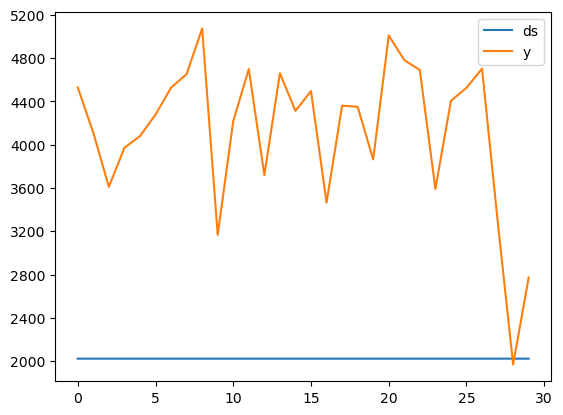

In [33]:
test.plot()
plt.show()

In [34]:
start_date='20231024'
end_date='20231031'
future_7days=pd.date_range(start=start_date, end=end_date, freq='D')
future_7days = pd.DataFrame(future_7days, columns = ['ds'])
future_7days['ds']= pd.to_datetime(future_7days['ds'])

In [35]:
future_7days

,ds
0,2023-10-24
1,2023-10-25
2,2023-10-26
3,2023-10-27
4,2023-10-28
5,2023-10-29
6,2023-10-30
7,2023-10-31


In [36]:
forecast = model.predict(future_7days)

In [37]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [38]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds           yhat     yhat_lower     yhat_upper
0 2023-10-24  548622.146089  269883.171877  826017.279476
1 2023-10-25  448877.610296  152033.666806  731714.531165
2 2023-10-26  533992.468262  270506.855234  806884.825618
3 2023-10-27  384113.362345  115263.335450  656101.756280
4 2023-10-28  449529.249604  173667.296670  697424.901054
5 2023-10-29  137132.282223 -141814.680973  403501.363945
6 2023-10-30  422223.229840  143411.893170  691768.930393
7 2023-10-31  486098.882775  194250.884382  758191.586316


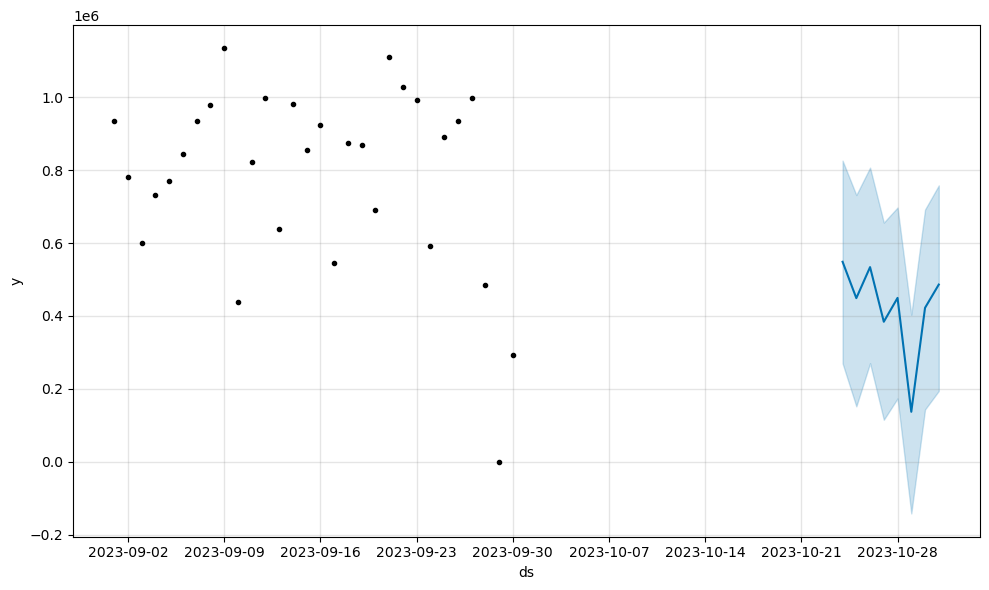

In [39]:
model.plot(forecast)
plt.show()

In [40]:
new = Prophet()
new.fit(combined)

19:58:09 - cmdstanpy - INFO - Chain [1] start processing
19:58:09 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = new.predict(future_7days)

In [42]:
print(future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds           yhat     yhat_lower    yhat_upper
0 2023-10-24  890730.453508  612441.254360  1.140675e+06
1 2023-10-25  855452.356728  614961.532491  1.140493e+06
2 2023-10-26  921246.317618  672649.403692  1.175815e+06
3 2023-10-27  881985.492227  610162.717247  1.139920e+06
4 2023-10-28  882104.102842  633775.976379  1.143618e+06
5 2023-10-29  452693.157192  166666.978312  7.154472e+05
6 2023-10-30  802937.259218  532942.325036  1.053219e+06
7 2023-10-31  895043.704265  618746.405477  1.161554e+06


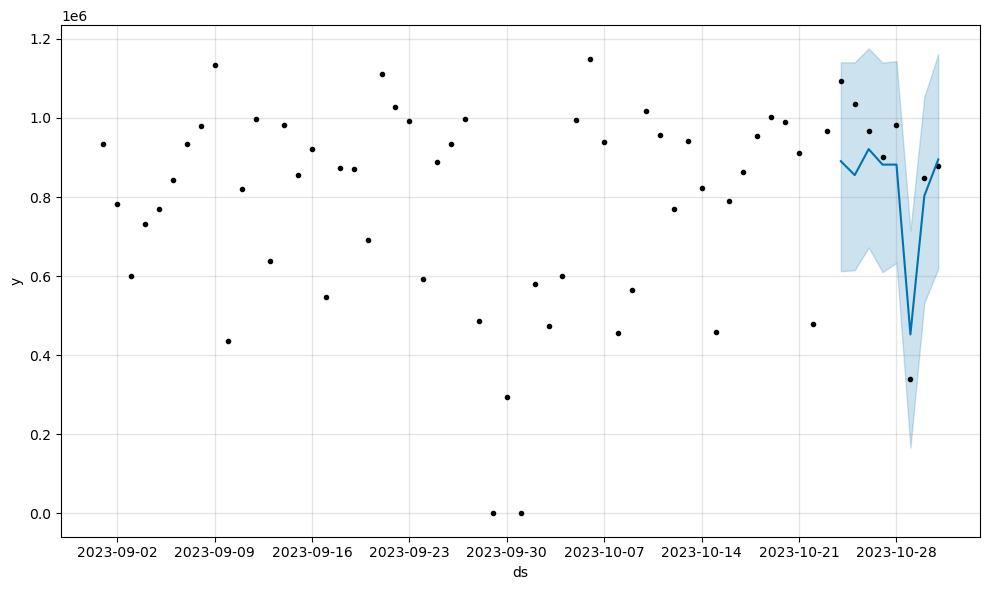

In [43]:
new.plot(future)
plt.show()